In [1]:
import numpy as np
import pandas as pd

# Load Dataset of melbourne housing price detection

In [2]:
data = pd.read_csv("./melb_data.csv")

In [3]:
# check data fileds

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [7]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [9]:
# Now fill NaN / missing values using fillna() or imputer
# Car, BuildingArea, YearBuilt, CouncilArea

In [10]:
data = data.fillna(data.mean())
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
# count null values for each attrrib
data.replace(np.nan, data.mean())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.000000,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.000000,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.000000,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.000000,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.000000,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.000000,181.0,151.96765,1964.684217,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.000000,245.0,210.00000,1910.000000,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.000000,256.0,107.00000,1890.000000,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.000000,0.0,151.96765,1964.684217,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.000000,220.0,75.00000,1900.000000,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0


In [12]:
data.fillna(data.mean())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.000000,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.000000,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.000000,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.000000,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.000000,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.000000,181.0,151.96765,1964.684217,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.000000,245.0,210.00000,1910.000000,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.000000,256.0,107.00000,1890.000000,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.000000,0.0,151.96765,1964.684217,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.000000,220.0,75.00000,1900.000000,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13580 non-null float64
Landsize         13580 non-null float64
BuildingArea     13580 non-null float64
YearBuilt        13580 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ M

In [14]:
# here column CouncilArea having string value
data["CouncilArea"] = data.fillna("No Val")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13580 non-null float64
Landsize         13580 non-null float64
BuildingArea     13580 non-null float64
YearBuilt        13580 non-null float64
CouncilArea      13580 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ M

In [16]:
# let us take review of all data values 
#and apply necessary steps on it.
#. check categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13580 non-null float64
Landsize         13580 non-null float64
BuildingArea     13580 non-null float64
YearBuilt        13580 non-null float64
CouncilArea      13580 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ M

In [17]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Abbotsford,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Abbotsford,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Abbotsford,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Abbotsford,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Abbotsford,-37.8072,144.9941,Northern Metropolitan,4019.0


In [18]:
# apply label encoding on required columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(data["Suburb"])

LabelEncoder()

In [20]:
data["Suburb"] = le.fit_transform(data["Suburb"])

In [21]:


data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Abbotsford,-37.7996,144.9984,Northern Metropolitan,4019.0
1,0,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Abbotsford,-37.8079,144.9934,Northern Metropolitan,4019.0
2,0,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Abbotsford,-37.8093,144.9944,Northern Metropolitan,4019.0
3,0,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Abbotsford,-37.7969,144.9969,Northern Metropolitan,4019.0
4,0,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Abbotsford,-37.8072,144.9941,Northern Metropolitan,4019.0


In [22]:
# drop address column
data = data.drop(["Address"], axis = 1)

In [23]:
# apply label encoding on all remaining columns
# drop price column
data.drop(["Price"], axis = 1)
cols = ["Type","Method", "SellerG", "CouncilArea", "Regionname","Date"]
def encode(col):
    c = col
    data[c] = le.fit_transform(data[c])


for i in cols:
    encode(i)


data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1480000.0,1,23,45,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,0,-37.7996,144.9984,2,4019.0
1,0,2,0,1035000.0,1,23,47,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,0,-37.8079,144.9934,2,4019.0
2,0,3,0,1465000.0,3,23,48,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,0,-37.8093,144.9944,2,4019.0
3,0,3,0,850000.0,0,23,48,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,0,-37.7969,144.9969,2,4019.0
4,0,4,0,1600000.0,4,155,49,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,0,-37.8072,144.9941,2,4019.0


In [24]:
# Split data in X and y
y = data['Price']

In [25]:
X = data.drop(['Price'], axis = 1)

In [26]:
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [27]:
X.head()

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1,23,45,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,0,-37.7996,144.9984,2,4019.0
1,0,2,0,1,23,47,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,0,-37.8079,144.9934,2,4019.0
2,0,3,0,3,23,48,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,0,-37.8093,144.9944,2,4019.0
3,0,3,0,0,23,48,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,0,-37.7969,144.9969,2,4019.0
4,0,4,0,4,155,49,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,0,-37.8072,144.9941,2,4019.0


In [28]:
# now Apply Scaling on X data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
sc.fit(X)
sc_data = sc.fit_transform(X)

In [30]:
sc_data

array([[-1.71982483, -0.98146337, -0.63200323, ...,  0.03063958,
        -0.87244412, -0.78462481],
       [-1.71982483, -0.98146337, -0.63200323, ..., -0.01747818,
        -0.87244412, -0.78462481],
       [-1.71982483,  0.06487613, -0.63200323, ..., -0.00785463,
        -0.87244412, -0.78462481],
       ...,
       [ 1.65763629,  0.06487613, -0.63200323, ..., -1.03776717,
         1.10358743, -0.24538926],
       [ 1.65763629,  1.11121563, -0.63200323, ..., -0.98377905,
         1.10358743, -0.24538926],
       [ 1.74622544,  1.11121563, -0.63200323, ..., -1.06557924,
         1.10358743, -0.20816122]])

In [31]:
sc_data = pd.DataFrame(sc_data)

In [32]:
sc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.719825,-0.981463,-0.632003,-0.363956,-1.386938,0.993589,-1.301485,-0.422415,-0.947035,-0.772376,-0.635232,-0.089316,0.000000,0.000000,-1.719825,0.121160,0.030640,-0.872444,-0.784625
1,-1.719825,-0.981463,-0.632003,-0.363956,-1.386938,1.115694,-1.301485,-0.422415,-0.947035,-0.772376,-1.676467,-0.100843,-0.186147,-2.232709,-1.719825,0.016437,-0.017478,-0.872444,-0.784625
2,-1.719825,0.064876,-0.632003,1.423252,-1.386938,1.176746,-1.301485,-0.422415,0.088284,0.673367,-1.676467,-0.106356,-0.005020,-2.232709,-1.719825,-0.001227,-0.007855,-0.872444,-0.784625
3,-1.719825,0.064876,-0.632003,-1.257560,-1.386938,1.176746,-1.301485,-0.422415,0.088284,0.673367,-0.635232,-0.116380,0.000000,0.000000,-1.719825,0.155226,0.016204,-0.872444,-0.784625
4,-1.719825,1.111216,-0.632003,2.316857,0.311181,1.237799,-1.301485,-0.422415,0.088284,-0.772376,0.406003,-0.109864,-0.025428,1.702236,-1.719825,0.025269,-0.010742,-0.872444,-0.784625


In [33]:
# Perform train-test spliting
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(sc_data,y, test_size = 0.2)

In [34]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
8707,-1.498352,-0.981463,1.769397,2.316857,1.661957,0.688327,-0.602841,0.856898,-0.947035,-0.772376,-1.676467,0.010671,0.000000,0.000000,-1.498352,-0.839009,0.026790,0.609580,-1.028320
10797,0.893555,0.064876,-0.632003,1.423252,-1.476990,1.604113,0.317325,-0.356244,0.088284,-0.772376,-0.635232,-0.062753,0.000000,0.000000,0.893555,1.021018,0.337920,-0.872444,3.242170
6869,-0.390988,1.111216,-0.632003,-0.363956,0.311181,1.237799,-0.057557,-0.720186,1.123604,0.673367,0.406003,-0.013386,0.466933,1.667719,-0.390988,0.724262,-1.015441,1.103587,-1.568241
10173,-1.143995,0.064876,-0.632003,-0.363956,-0.319182,0.322013,-1.318525,0.173127,0.088284,0.673367,-0.635232,-0.116630,0.030696,1.702236,-1.143995,-0.252436,0.125528,-0.872444,-1.602500
5101,0.893555,-0.981463,-0.632003,-0.363956,0.311181,-1.570611,0.181004,-0.356244,-0.947035,-0.772376,0.406003,-0.082550,-0.152983,0.183485,0.893555,1.251660,0.124950,-0.872444,3.242170


In [35]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 8707 to 9170
Data columns (total 19 columns):
0     10864 non-null float64
1     10864 non-null float64
2     10864 non-null float64
3     10864 non-null float64
4     10864 non-null float64
5     10864 non-null float64
6     10864 non-null float64
7     10864 non-null float64
8     10864 non-null float64
9     10864 non-null float64
10    10864 non-null float64
11    10864 non-null float64
12    10864 non-null float64
13    10864 non-null float64
14    10864 non-null float64
15    10864 non-null float64
16    10864 non-null float64
17    10864 non-null float64
18    10864 non-null float64
dtypes: float64(19)
memory usage: 1.7 MB


In [36]:
# use decision tree regressor for prediction
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [37]:
dt_model.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
pred = dt_model.predict(xtest)

In [39]:
ytest.head()

4217     785000.0
7751     680000.0
11813    650000.0
3418     650000.0
11142    525000.0
Name: Price, dtype: float64

In [40]:
dt_pred = pd.DataFrame(pred)

In [41]:
dt_pred.head()

,0
0,900000.0
1,1150000.0
2,640000.0
3,627500.0
4,625000.0


In [42]:
# lets find error
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(ytest, dt_pred)

In [43]:
error

235045.62886597938

In [44]:
#plot graph
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Predicted Price')

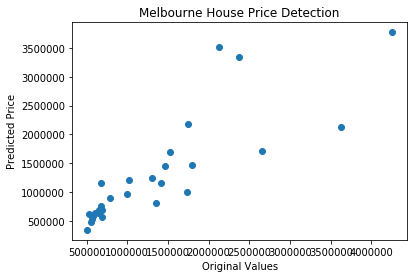

In [45]:
plt.scatter(x = ytest.head(30), y = dt_pred.head(30))
plt.title("Melbourne House Price Detection")
plt.xlabel("Original Values")
plt.ylabel("Predicted Price")

In [57]:
def get_mse(no_leaf_nodes, x_train, x_test, y_train, y_test):
    model = DecisionTreeRegressor(min_samples_leaf= no_leaf_nodes, random_state = 1)
    model.fit(x_train, ytrain)
    pred = model.predict(xtest)
    df_pred = pd.DataFrame(pred)
    mse = mean_absolute_error(ytest,pred)
    return mse,


In [66]:

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 1000]
scores=9999999
scores1=0
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for i in candidate_max_leaf_nodes:
    scores1 = get_mse(i,xtrain, xtest, ytrain, ytest)
    if scores1 < scores+10:
        scores = scores1
        max_leaf_nodes = i
    print("MAE: ",scores,"No. of Nodes: ",i)
        
print("MAE Final: ",scores,"No. of Nodes: ",max_leaf_nodes)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = max_leaf_nodes
#xtrain, xtest, ytrain, ytest

MAE:  207583.50117659604 No. of Nodes:  5
MAE:  200651.55185888775 No. of Nodes:  25
MAE:  200651.55185888775 No. of Nodes:  50
MAE:  200651.55185888775 No. of Nodes:  100
MAE:  200651.55185888775 No. of Nodes:  250
MAE:  200651.55185888775 No. of Nodes:  500
MAE:  200651.55185888775 No. of Nodes:  1000
MAE Final:  200651.55185888775 No. of Nodes:  25
